In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "drive/MyDrive/Colab Notebooks/Data analysis with python/Largest Bank"

 Data  'Largest Bank.ipynb'


In [5]:
pip install pandas

In [6]:
pip install numpy

In [7]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv('drive/MyDrive/Colab Notebooks/Data analysis with python/Largest Bank/Data/LargestBanks.csv')

In [9]:
data.head()

,Rank,Bank name,Country,Total assets 2022 (US$ billion)
0,1,Industrial and Commercial Bank of China Limited,China,5742.86
1,2,China Construction Bank,China,5016.81
2,3,Agricultural Bank of China,China,4919.03
3,4,Bank of China,China,4192.12
4,5,JPMorgan Chase,United States of America,3665.74


In [10]:
data.describe()

,Rank,Total assets 2022 (US$ billion)
count,100.000000,100.000000
mean,50.500000,1119.201100
std,29.011492,1076.163241
min,1.000000,302.220000
25%,25.750000,415.735000
50%,50.500000,677.285000
75%,75.250000,1448.850000
max,100.000000,5742.860000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             100 non-null    int64  
 1   Bank name                        100 non-null    object 
 2   Country                          100 non-null    object 
 3   Total assets 2022 (US$ billion)  100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [12]:
#Check shape, columns, data types.
print("Shape of the dataset:",data.shape)
print("Columns name:",data.columns.tolist())

print("Data types:",data.dtypes)

Shape of the dataset: (100, 4)
Columns name: ['Rank', 'Bank name', 'Country', 'Total assets 2022 (US$\xa0billion)']
Data types: Rank                                 int64
Bank name                           object
Country                             object
Total assets 2022 (US$ billion)    float64
dtype: object


In [13]:
print("Missing values:",data.isna().sum())

Missing values: Rank                               0
Bank name                          0
Country                            0
Total assets 2022 (US$ billion)    0
dtype: int64


In [14]:
data_new=data.dropna()

In [15]:
data_new.head()

,Rank,Bank name,Country,Total assets 2022 (US$ billion)
0,1,Industrial and Commercial Bank of China Limited,China,5742.86
1,2,China Construction Bank,China,5016.81
2,3,Agricultural Bank of China,China,4919.03
3,4,Bank of China,China,4192.12
4,5,JPMorgan Chase,United States of America,3665.74


In [16]:
data_new.tail()

,Rank,Bank name,Country,Total assets 2022 (US$ billion)
95,96,National Bank of Canada,Canada,312.67
96,97,Macquarie Group,Australia,313.47
97,98,Nationwide Building Society,United Kingdom,311.93
98,99,Raiffeisen Gruppe,Switzerland,303.50
99,100,First Abu Dhabi Bank,United Arab Emirates,302.22


In [17]:

data_new.columns = data_new.columns.str.replace('\xa0', ' ')

data_new.rename(columns={"Total assets 2022 (US$ billion)": "Total_Assets_USD_Billion"}, inplace=True)


In [18]:
data_new.head()

,Rank,Bank name,Country,Total_Assets_USD_Billion
0,1,Industrial and Commercial Bank of China Limited,China,5742.86
1,2,China Construction Bank,China,5016.81
2,3,Agricultural Bank of China,China,4919.03
3,4,Bank of China,China,4192.12
4,5,JPMorgan Chase,United States of America,3665.74


In [19]:
pip install matplotlib

In [20]:
pip install seaborn

In [21]:
pip install plotly

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

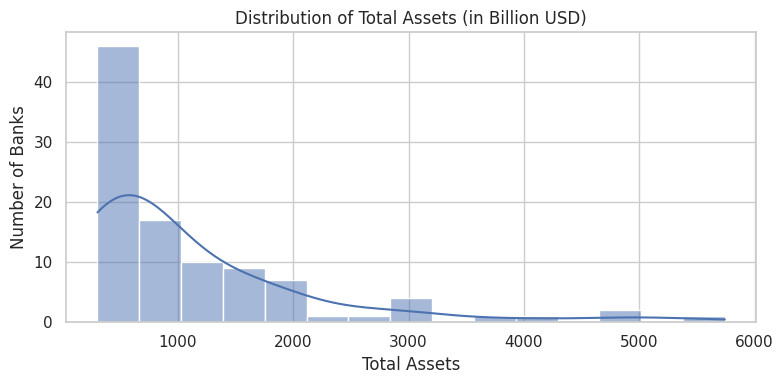

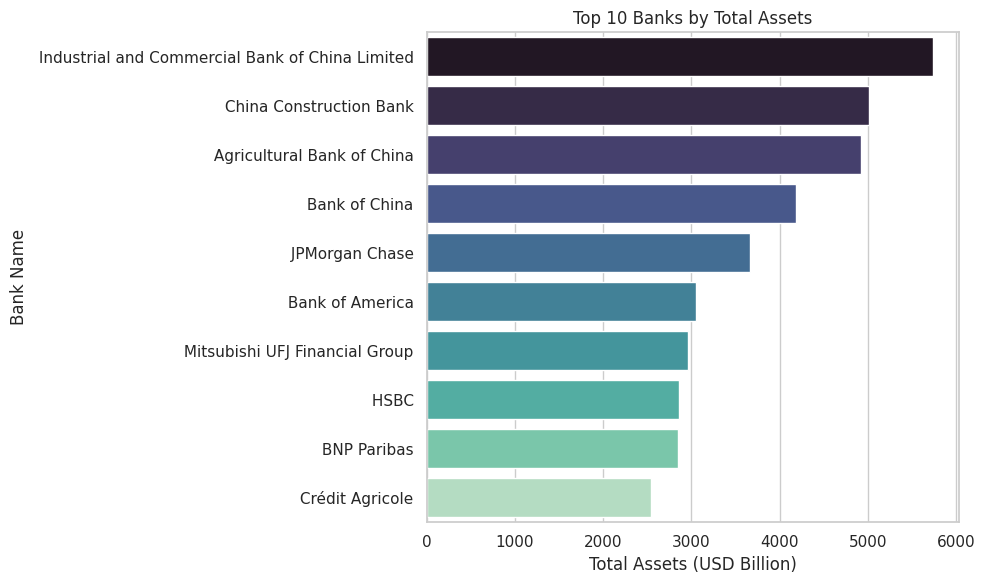

/tmp/ipython-input-23-2038469578.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Total_Assets_USD_Billion", data=top_countries, palette="viridis")


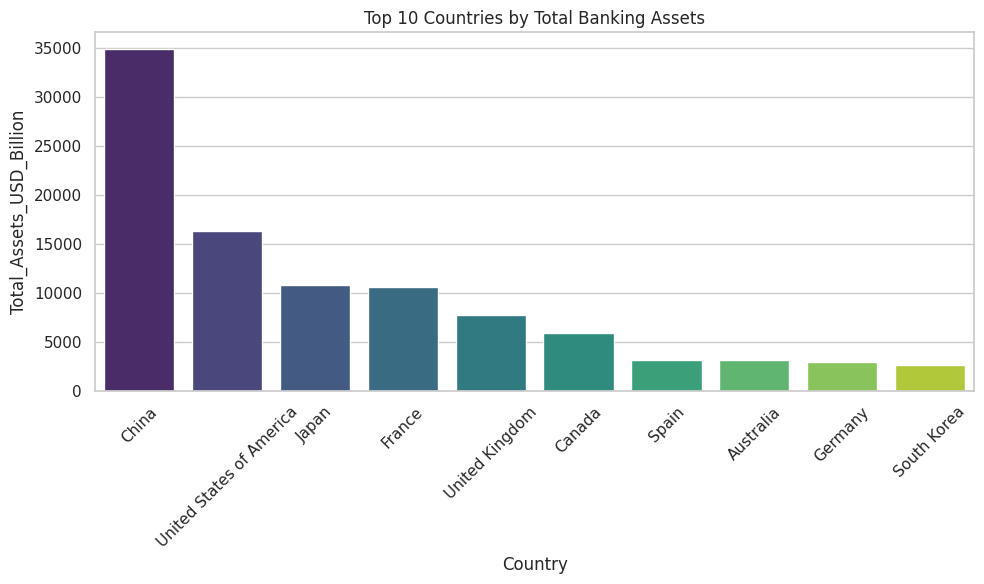

In [23]:
sns.set(style="whitegrid")

# Top 10 banks
top10_banks = data_new.sort_values(by="Total_Assets_USD_Billion", ascending=False).head(10)

# Top 10 countries
top_countries = data_new.groupby("Country")["Total_Assets_USD_Billion"].sum().sort_values(ascending=False).head(10).reset_index()

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(data_new["Total_Assets_USD_Billion"], bins=15, kde=True)
plt.title("Distribution of Total Assets (in Billion USD)")
plt.xlabel("Total Assets")
plt.ylabel("Number of Banks")
plt.tight_layout()
plt.show()


# Bar plot: top banks
plt.figure(figsize=(10, 6))
sns.barplot(y="Bank name", x="Total_Assets_USD_Billion", data=top10_banks, palette="mako")
plt.title("Top 10 Banks by Total Assets")
plt.xlabel("Total Assets (USD Billion)")
plt.ylabel("Bank Name")
plt.tight_layout()
plt.show()

# Bar plot: top countries
plt.figure(figsize=(10, 6))
sns.barplot(x="Country", y="Total_Assets_USD_Billion", data=top_countries, palette="viridis")
plt.title("Top 10 Countries by Total Banking Assets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import ttest_ind

china_banks = data_new[data_new['Country'] == 'China']['Total_Assets_USD_Billion']
us_banks = data_new[data_new['Country'] == 'United States of America']['Total_Assets_USD_Billion']


In [25]:
print("china_banks:",china_banks)

china_banks: 0     5742.86
1     5016.81
2     4919.03
3     4192.12
11    2039.56
14    1883.72
24    1470.00
27    1343.54
28    1239.28
29    1184.28
33    1051.97
38     913.49
44     771.55
64     540.04
66     528.91
71     447.54
75     410.83
78     405.13
81     380.14
88     343.05
Name: Total_Assets_USD_Billion, dtype: float64


In [26]:
print("us_banks:",us_banks)

us_banks: 4     3665.74
5     3051.38
10    2416.68
15    1881.02
25    1441.80
30    1180.23
50     674.81
59     557.26
61     555.26
69     455.25
76     405.78
Name: Total_Assets_USD_Billion, dtype: float64


In [27]:
t_stat, p_value = ttest_ind(china_banks, us_banks, alternative='greater')

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 0.445
P-value: 0.32991


In [28]:
# Step 1: Add binary target column based on median
median_asset = data_new["Total_Assets_USD_Billion"].median()
data_new["High_Asset"] = (data_new["Total_Assets_USD_Billion"] > median_asset).astype(int)


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le_bank = LabelEncoder()
le_country = LabelEncoder()

data_new["Bank_encoded"] = le_bank.fit_transform(data_new["Bank name"])
data_new["Country_encoded"] = le_country.fit_transform(data_new["Country"])

In [31]:
data_new.head()

,Rank,Bank name,Country,Total_Assets_USD_Billion,High_Asset,Bank_encoded,Country_encoded
0,1,Industrial and Commercial Bank of China Limited,China,5742.86,1,48,5
1,2,China Construction Bank,China,5016.81,1,21,5
2,3,Agricultural Bank of China,China,4919.03,1,1,5
3,4,Bank of China,China,4192.12,1,10,5
4,5,JPMorgan Chase,United States of America,3665.74,1,51,24


In [32]:
# Features can include encoded bank name, country, and rank
X = data_new[["Bank_encoded", "Country_encoded", "Rank"]]
y = data_new["High_Asset"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[ 8  0]
 [ 0 12]]
